# Deep Learning Training With Full Dataset

We trained a number of deep learning LSTM models with full dataset (9 million examples). 

In this notebook, we will look at the scores (accuracy, loss, custom score), classification reports, confusion matrix, and network history of these architectures with various sample sizes

## Model Validation

Model validation was done in the following manner:

* Dataset was split into train and test set - use sklearn default of 75% training set, 25% test set
* 20% of the training set was used as a validation set when calling keras.model.fit



In [8]:
# import sibling utilities
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import importlib
import pickle
import os
from pprint import pprint


import util.dict_util as du
import util.report_util as ru
import util.plot_util as pu

logging.basicConfig(level=logging.ERROR)

%matplotlib inline
sns.set(font_scale=2)


In [9]:
def set_plt_name(df: pd.DataFrame):
    """
    Set plt_name column based on DF values
    
    DF will be edited in place
    
    :param df: dataframe to add plt_name column to
    :return: df with plt_name added
    """
    df["plt_name"] = df.description.apply(lambda x: x.replace("1 Layer ", ""))
    df["plt_name"] = df.plt_name.apply(lambda x: x.replace("LSTM ", ""))
    df["plt_name"] = df.plt_name.apply(lambda x: x.replace("Recurrent Dropout ", "RDR "))
    df["plt_name"] = df.plt_name.apply(lambda x: x.replace("Dropout ", "DR "))
    df["plt_name"] = df.plt_name.apply(lambda x: x.replace("Batch Size ", "BS "))
    df["plt_name"] = df.plt_name.apply(lambda x: x.replace("Learning Rate ", "LR "))
    df["plt_name"] = df.plt_name.apply(lambda x: x.replace("LSTMB128 ", ""))
    
    return df


In [17]:
REPORT_DIR = "../reports"
report_all = pd.DataFrame()


# LSTMB128_DR0_RDR20_BATCH32_LR001
# TODO: retrain 500k samples - 6.9.1.4-LSTMB128-GloVe_with_stop_nonlemmatized-500k-prototype.csv
report_lstmb128_dr0_rdr20_batch32_lr001 = ru.load_dnn_report(REPORT_DIR, 
                                                            'LSTMB128_dr0_rdr2_batch32_lr001-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                           convert_format = True)
report_lstmb128_dr0_rdr20_batch32_lr001 = set_plt_name(report_lstmb128_dr0_rdr20_batch32_lr001)
report_all = report_all.append(report_lstmb128_dr0_rdr20_batch32_lr001, ignore_index = True)


# LSTMB128_DR0_RDR20_BATCH32_LR01
# 6.9.8.4-LSTMB128_dr0_rdr20_batch128_lr01-glove_with_stop_nonlemmatized-500k-prototype.ipynb
report_lstmb128_dr0_rdr20_batch32_lr01 = ru.load_dnn_report(REPORT_DIR,
                                                            'LSTMB128_dr0_rdr2_batch32_lr01-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                            convert_format = True)
report_lstmb128_dr0_rdr20_batch32_lr01 = set_plt_name(report_lstmb128_dr0_rdr20_batch32_lr01)
report_all = report_all.append(report_lstmb128_dr0_rdr20_batch32_lr01, ignore_index = True)


# LSTM16_DR0_RDR20_BATCH32_LR001
# 6.9.2.4-LSTMB16_dr0_rdr20_batch32_lr_001-GloVe_with_stop_nonlemmatized-500k-prototype
# report_lstmb16_2
report_lstmb16_dr0_dr20_batch32_lr_001 = ru.load_dnn_report(REPORT_DIR, 
                                                            'LSTMB16_dr0_rdr2_batch32_lr001-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                           convert_format = True)
report_lstmb16_dr0_dr20_batch32_lr_001 = set_plt_name(report_lstmb16_dr0_dr20_batch32_lr_001)
report_all = report_all.append(report_lstmb16_dr0_dr20_batch32_lr_001, ignore_index = True)






# LSTM16_DR0_RDR20_BATCH128_LR01
# 6.9.11.4-LSTMB128_dr0_rdr20_batch128_lr01-glove_with_stop_nonlemmatized-500k-prototype
# report_lstmb16_2
report_lstmb128_dr0_rdr20_batch128_lr01 = ru.load_dnn_report(REPORT_DIR, 
                                                            'LSTMB128_dr0_rdr2_batch128_lr01-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                           convert_format = True)
report_lstmb128_dr0_rdr20_batch128_lr01 = set_plt_name(report_lstmb128_dr0_rdr20_batch128_lr01)
report_all = report_all.append(report_lstmb128_dr0_rdr20_batch128_lr01, ignore_index = True)



# LSTM16_DR0_RDR20_BATCH128_LR001
# 6.9.12.4-LSTMB128_dr0_rdr20_batch128_lr001-glove_with_stop_nonlemmatized-500k-prototype.ipynb
# report_lstmb16_2
report_lstmb128_dr0_rdr20_batch128_lr001 = ru.load_dnn_report(REPORT_DIR, 
                                                            'LSTMB128_dr0_rdr2_batch128_lr001-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                           convert_format = True)
report_lstmb128_dr0_rdr20_batch128_lr001 = set_plt_name(report_lstmb128_dr0_rdr20_batch128_lr001)
report_all = report_all.append(report_lstmb128_dr0_rdr20_batch128_lr001, ignore_index = True)




# LSTM16_DR20_RDR20_BATCH128_LR001
# 6.9.3.4-LSTMB16_dr20_rdr20_batch128_lr001-GloVe_with_stop_nonlemmatized-500k-prototype
report_lstmb16_dr20_rdr20_batch128_lr1001 = ru.load_dnn_report(REPORT_DIR, 
                                                               'LSTMB16_dr2_rdr2_batch128_lr001-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                              convert_format = True)
report_lstmb16_dr20_rdr20_batch128_lr1001 = set_plt_name(report_lstmb16_dr20_rdr20_batch128_lr1001)
report_all = report_all.append(report_lstmb16_dr20_rdr20_batch128_lr1001, ignore_index = True)


# LSTMB128_DR0_RDR0_BATCH32_LR01
# 6.9.9.4-LSTMB128_dr0_rdr0_batch32_lr01-glove_with_stop_nonlemmatized-500k-prototype
report_lstmb128_dr0_rdr0_batch32_lr01 = ru.load_dnn_report(REPORT_DIR, 
                                                               'LSTMB128_dr0_rdr0_batch32_lr01-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                              convert_format = True)
report_lstmb128_dr0_rdr0_batch32_lr01 = report_lstmb128_dr0_rdr0_batch32_lr01.append(
    ru.load_dnn_report(REPORT_DIR, 
                       'paperspace-LSTMB128-1x128-dr0-rdr0-batch32-lr01-glove_with_stop_nonlemmatized-sampling_none-review_body-report.csv', 
                       convert_format = True), ignore_index = True)
report_lstmb128_dr0_rdr0_batch32_lr01 = set_plt_name(report_lstmb128_dr0_rdr0_batch32_lr01)
report_all = report_all.append(report_lstmb128_dr0_rdr0_batch32_lr01, ignore_index = True)


# LSTMB128_DR0_RDR0_BATCH32_LR001
# 6.9.10.4-LSTMB128_dr0_rdr0_batch32_lr001-glove_with_stop_nonlemmatized-500k-prototype
report_lstmb128_dr0_rdr0_batch32_lr001 = ru.load_dnn_report(REPORT_DIR, 
                                                               'LSTMB128_dr0_rdr0_batch32_lr001-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                              convert_format = True)
report_lstmb128_dr0_rdr0_batch32_lr001 = set_plt_name(report_lstmb128_dr0_rdr0_batch32_lr001)
report_all = report_all.append(report_lstmb128_dr0_rdr0_batch32_lr001, ignore_index = True)



# LSTM128_DR0_RDR0_BATCH128_LR01
# 6.9.4.4-LSTMB128_dr0_rdr0_batch128_lr01-GloVe_with_stop_nonlemmatized-500k-prototype
report_lstmb128_dr0_rdr0_batch128_lr01 = ru.load_dnn_report(REPORT_DIR, 
                                                            'LSTMB128_dr0_rdr0_batch128_lr01-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                           convert_format = True)
report_lstmb128_dr0_rdr0_batch128_lr01 = report_lstmb128_dr0_rdr0_batch128_lr01.append(ru.load_dnn_report(REPORT_DIR, 
                                                            'paperspace-LSTMB128-1x128-dr0-rdr0-batch128-lr01-glove_with_stop_nonlemmatized-sampling_none-review_body-report.csv',
                                                           convert_format = True))
report_lstmb128_dr0_rdr0_batch128_lr01 = set_plt_name(report_lstmb128_dr0_rdr0_batch128_lr01)
report_all = report_all.append(report_lstmb128_dr0_rdr0_batch128_lr01, ignore_index = True)





# LSTM128_DR20_RDR20_BATCH128_LR01
# 6.9.5.4-LSTMB128_dr20_rdr20_batch128_lr01-GloVe_with_stop_nonlemmatized-500k-prototype
report_lstmb128_dr20_rdr20_batch128_lr01 = ru.load_dnn_report(REPORT_DIR, 
                                                              'LSTMB128_dr2_rdr2_batch128_lr01-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                             convert_format = True)
## load paperspace trained report on full dataset
report_lstmb128_dr20_rdr20_batch128_lr01 = report_lstmb128_dr20_rdr20_batch128_lr01.append(ru.load_dnn_report(REPORT_DIR, 
                                                            'paperspace-LSTMB128-1x128-dr2-rdr2-batch128-lr01-glove_with_stop_nonlemmatized-sampling_none-review_body-report.csv',
                                                             convert_format = True), ignore_index = True)
report_lstmb128_dr20_rdr20_batch128_lr01 = set_plt_name(report_lstmb128_dr20_rdr20_batch128_lr01)
report_all = report_all.append(report_lstmb128_dr20_rdr20_batch128_lr01, ignore_index = True)



# LSTM128_DR20_RDR20_BATCH128_LR001
# 6.9.6.4-LSTMB128_dr20_rdr20_batch128_lr001-GloVe_with_stop_nonlemmatized-500k-prototype.ipynb
report_lstmb128_dr20_rdr20_batch128_lr001 = ru.load_dnn_report(REPORT_DIR, 
                                                               'LSTMB128_dr2_rdr2_batch128_lr001-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                              convert_format = True)
report_lstmb128_dr20_rdr20_batch128_lr001 = set_plt_name(report_lstmb128_dr20_rdr20_batch128_lr001)
report_all = report_all.append(report_lstmb128_dr20_rdr20_batch128_lr001, ignore_index = True)


# LSTM128_DR20_RDR20_BATCH32_LR001
# 6.9.7.4-LSTMB128_dr20_rdr20_batch32_lr001-GloVe_with_stop_nonlemmatized-500k-prototype.ipynb
report_lstmb128_dr20_rdr20_batch32_lr001 = ru.load_dnn_report(REPORT_DIR, 
                                                              'LSTMB128_dr2_rdr2_batch32_lr001-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                             convert_format = True)
report_lstmb128_dr20_rdr20_batch32_lr001 = set_plt_name(report_lstmb128_dr20_rdr20_batch32_lr001)
report_all = report_all.append(report_lstmb128_dr20_rdr20_batch32_lr001, ignore_index = True)


# LSTM128_DR0_RDR0_BATCH128_LR001
# 6.9.4.4.1-LSTMB128_dr0_rdr0_batch128_lr001-GloVe_with_stop_nonlemmatized-500k-prototype.ipynb
report_lstmb128_dr0_rdr0_batch128_lr001 = ru.load_dnn_report(REPORT_DIR, 
                                                             'LSTMB128_dr0_rdr0_batch128_lr001-glove_with_stop_nonlemmatized-dl_prototype-report.csv',
                                                            convert_format = True)
report_lstmb128_dr0_rdr0_batch128_lr001 = set_plt_name(report_lstmb128_dr0_rdr0_batch128_lr001)
report_all = report_all.append(report_lstmb128_dr0_rdr0_batch128_lr001, ignore_index = True)



In [15]:
# report_all = report_lstmb16_dr0_dr20_batch32_lr_001.append(report_lstmb16_dr20_rdr20_batch128_lr1001, ignore_index = True). \
#                                 append(report_lstmb128_dr0_rdr0_batch32_lr01, ignore_index = True). \
#                                 append(report_lstmb128_dr0_rdr0_batch32_lr001, ignore_index = True). \
#                                 append(report_lstmb128_dr0_rdr0_batch128_lr01, ignore_index = True). \
#                                 append(report_lstmb128_dr0_rdr0_batch128_lr001, ignore_index = True). \
#                                 append(report_lstmb128_dr0_rdr20_batch32_lr01, ignore_index = True). \
#                                 append(report_lstmb128_dr0_rdr20_batch32_lr001, ignore_index = True). \
#                                 append(report_lstmb128_dr0_rdr20_batch128_lr01, ignore_index = True). \
#                                 append(report_lstmb128_dr0_rdr20_batch128_lr001, ignore_index = True). \
#                                 append(report_lstmb128_dr20_rdr20_batch128_lr01, ignore_index = True). \
#                                 append(report_lstmb128_dr20_rdr20_batch128_lr001, ignore_index = True). \
#                                 append(report_lstmb128_dr20_rdr20_batch32_lr001, ignore_index = True)
# report_all.sample_size.unique()

In [18]:
report_all.sample_size.unique()

array([  49887.,   99772.,  199538.,  498831.,  997682., 8978916.,
       2244642., 4489324.])

# Model Scores, Classification Report, and Network History



Model: 128 Units, DR 0.0, RDR 0.0, BS 32, LR 0.01


Report file(s):
	LSTMB128_dr0_rdr0_batch32_lr01-glove_with_stop_nonlemmatized-dl_prototype-report.csv
	paperspace-LSTMB128-1x128-dr0-rdr0-batch32-lr01-glove_with_stop_nonlemmatized-sampling_none-review_body-report.csv
Notebooks Used:
	6.9.9.4-LSTMB128_dr0_rdr0_batch32_lr01-glove_with_stop_nonlemmatized-500k-prototype.ipynb
	6.9.9.5-LSTMB128_dr0_rdr0_batch32_lr01-glove_with_stop_nonlemmatized-1mil-prototype.ipynb
	paperspace
Scores:
    sample_size  accuracy  accuracy_train      loss  loss_train  eval_metric  \
13     498831.0  0.610987        0.621534  0.953826    0.928097     0.511150   
14     997682.0  0.638302        0.643586  0.917821    0.903432     0.527285   
15    8978916.0  0.647152        0.647462  0.884052    0.883016     0.348662   

    eval_metric_train  
13           0.541472  
14           0.540539  
15           0.349598  


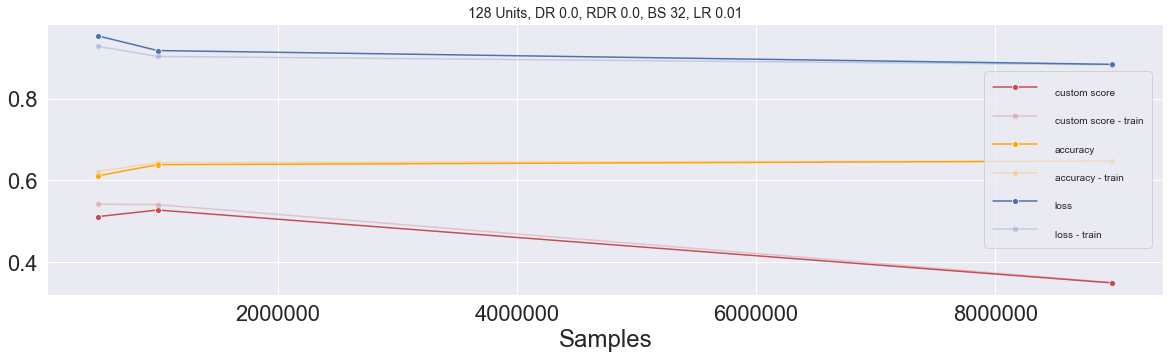

128 Units, DR 0.0, RDR 0.0, BS 32, LR 0.01 - Classification Report - Test Set


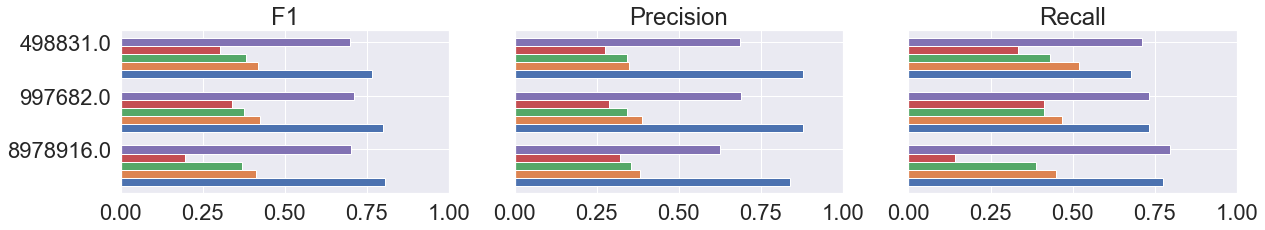

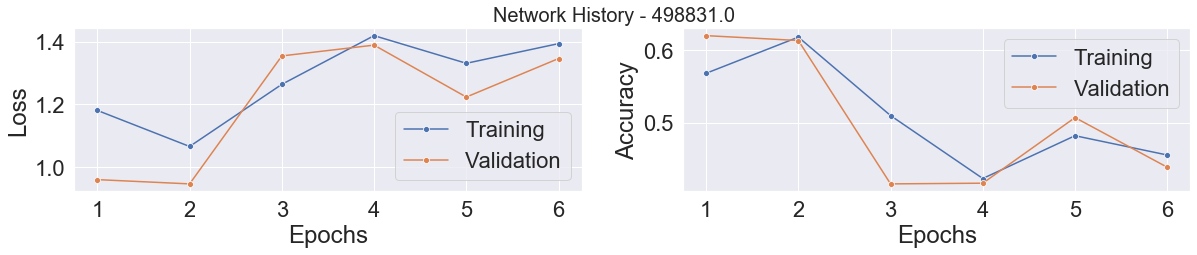

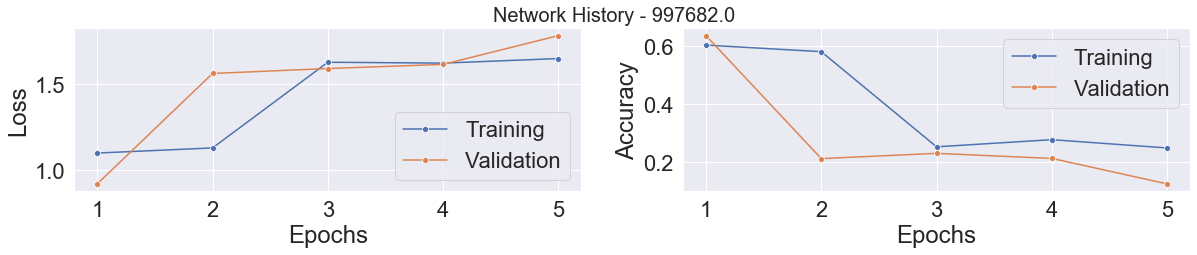

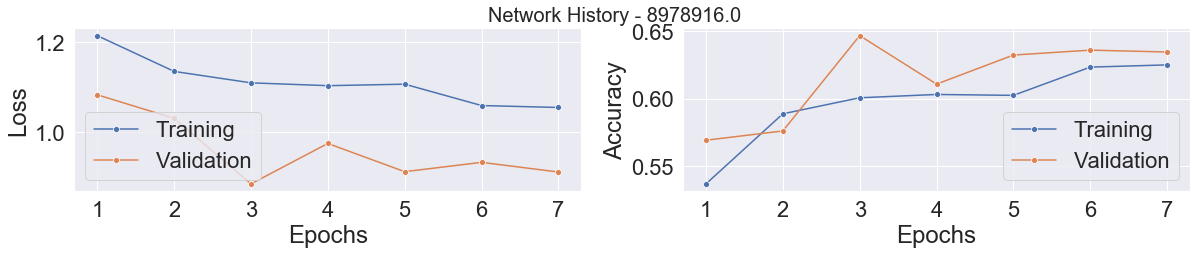

128 Units, DR 0.0, RDR 0.0, BS 32, LR 0.01 - Confusion Matrix - Sample Size: 498831.0
[[12395, 3148, 1248, 366, 278],
 [2760, 2724, 1974, 505, 168],
 [1184, 2164, 4845, 2547, 514],
 [474, 844, 3401, 10791, 5311],
 [1273, 1006, 2639, 16709, 45440]]

128 Units, DR 0.0, RDR 0.0, BS 32, LR 0.01 - Confusion Matrix - Sample Size: 997682.0
[[25714, 6784, 1701, 314, 506],
 [5731, 6846, 3130, 625, 268],
 [2379, 5654, 9228, 3910, 1100],
 [942, 2143, 7332, 19428, 11790],
 [2497, 2301, 5483, 25625, 97990]]

128 Units, DR 0.0, RDR 0.0, BS 32, LR 0.01 - Confusion Matrix - Sample Size: 8978916.0
[[251001, 20587, 24329, 6349, 12465],
 [69767, 21097, 38227, 11875, 8492],
 [35104, 16032, 78896, 51571, 21778],
 [14245, 4574, 49754, 167713, 137891],
 [31918, 3226, 32010, 201855, 933973]]



Model: 128 Units, DR 0.0, RDR 0.0, BS 128, LR 0.01


Report file(s):
	LSTMB128_dr0_rdr0_batch128_lr01-glove_with_stop_nonlemmatized-dl_prototype-report.csv
	paperspace-LSTMB128-1x128-dr0-rdr0-batch128-lr01-glove_with_s

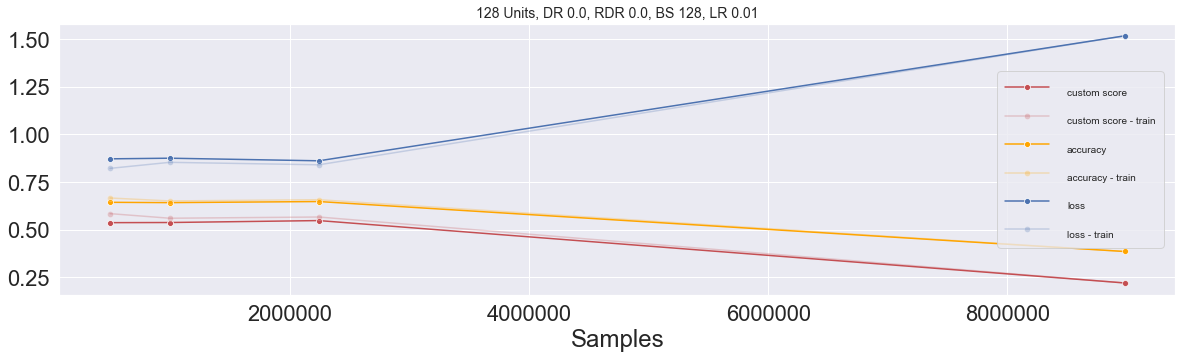

128 Units, DR 0.0, RDR 0.0, BS 128, LR 0.01 - Classification Report - Test Set


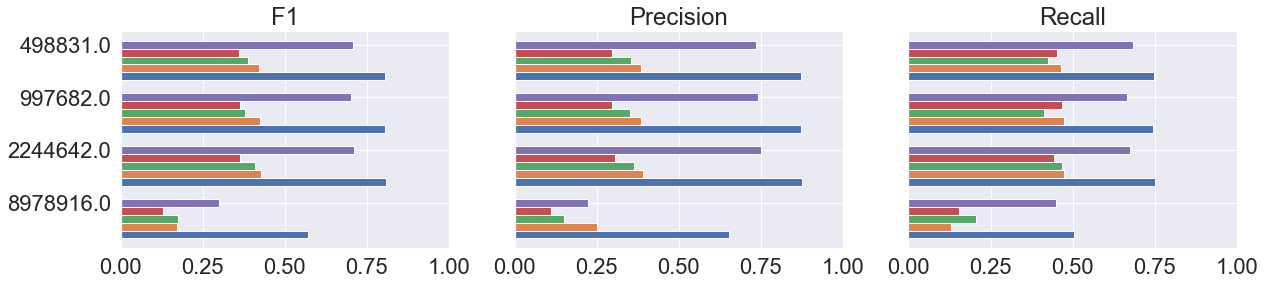

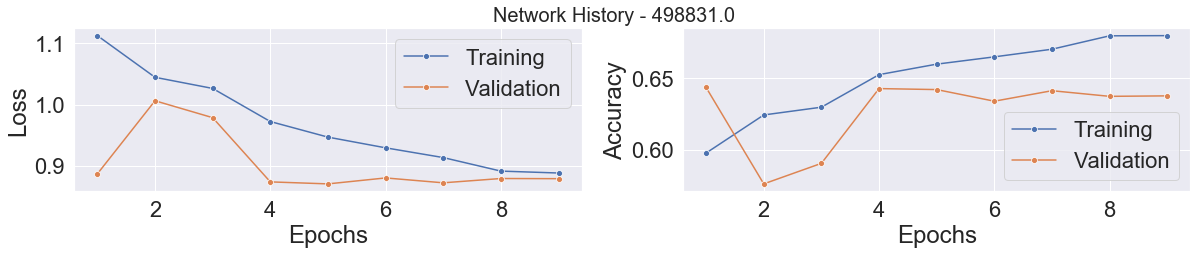

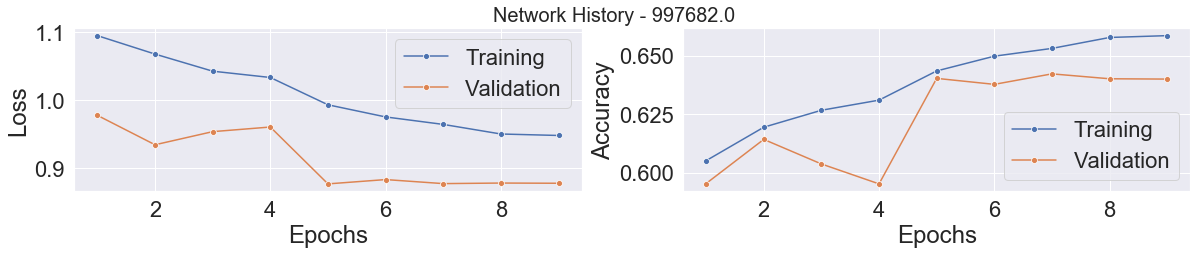

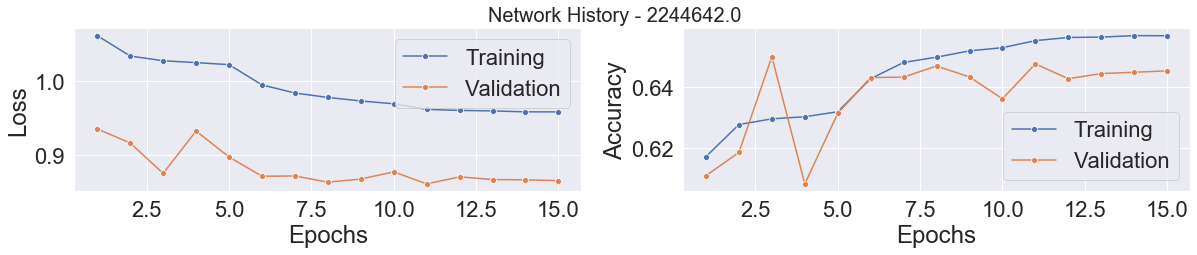

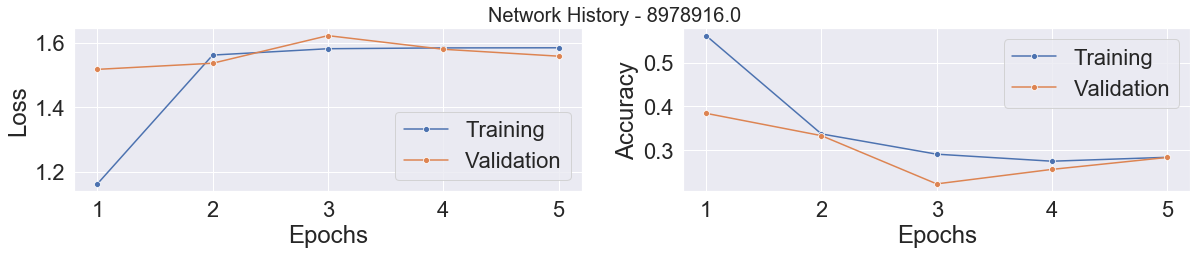

128 Units, DR 0.0, RDR 0.0, BS 128, LR 0.01 - Confusion Matrix - Sample Size: 498831.0
[[11902, 4085, 1013, 185, 250],
 [2264, 3672, 1686, 318, 191],
 [930, 2790, 4801, 2083, 650],
 [327, 936, 3653, 9658, 6247],
 [785, 844, 2421, 12857, 50160]]

128 Units, DR 0.0, RDR 0.0, BS 128, LR 0.01 - Confusion Matrix - Sample Size: 997682.0
[[23316, 8960, 1824, 411, 508],
 [4344, 7787, 3465, 677, 327],
 [1735, 5759, 9177, 4382, 1218],
 [624, 1855, 7003, 19755, 12398],
 [1481, 1834, 4545, 26101, 99935]]

128 Units, DR 0.0, RDR 0.0, BS 128, LR 0.01 - Confusion Matrix - Sample Size: 2244642.0
[[53455, 18892, 4724, 931, 1089],
 [9987, 16420, 8616, 1433, 640],
 [3652, 11649, 23829, 9207, 2753],
 [1208, 3425, 17345, 44432, 27550],
 [2854, 3193, 11165, 57746, 224966]]

128 Units, DR 0.0, RDR 0.0, BS 128, LR 0.01 - Confusion Matrix - Sample Size: 8978916.0
[[141780, 35089, 33242, 14951, 89669],
 [51323, 23220, 24255, 11235, 39425],
 [54610, 27711, 41765, 21602, 57693],
 [89276, 39685, 62630, 48354, 1342

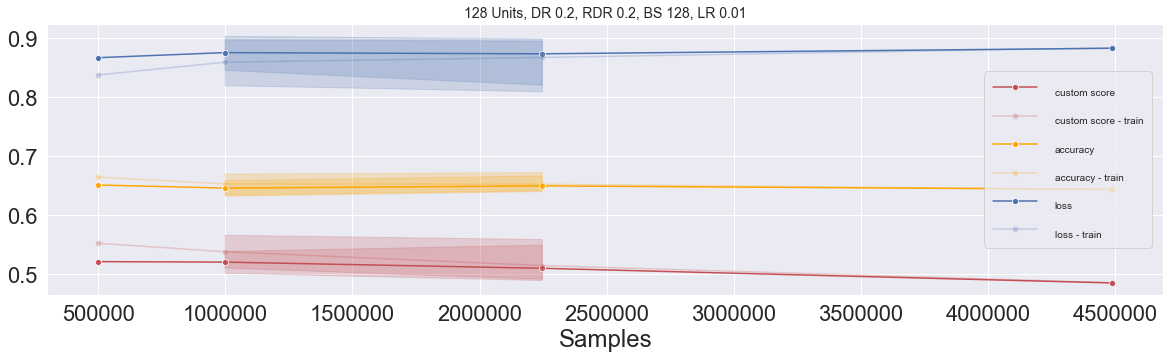

128 Units, DR 0.2, RDR 0.2, BS 128, LR 0.01 - Classification Report - Test Set


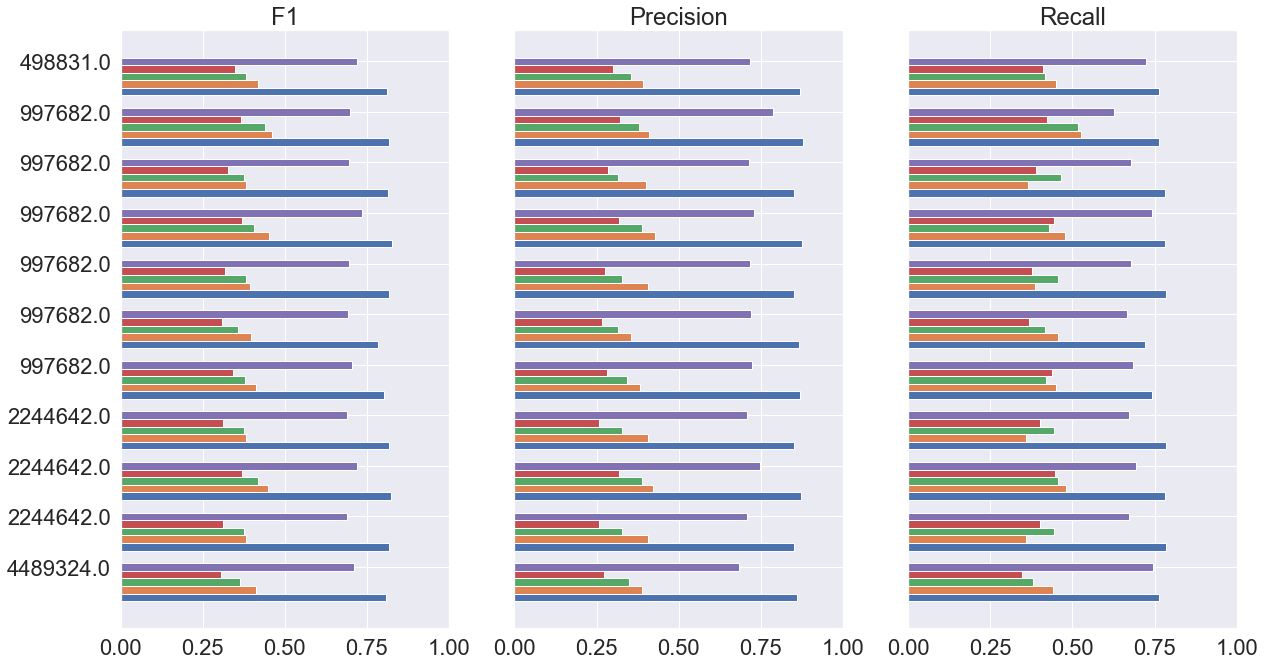

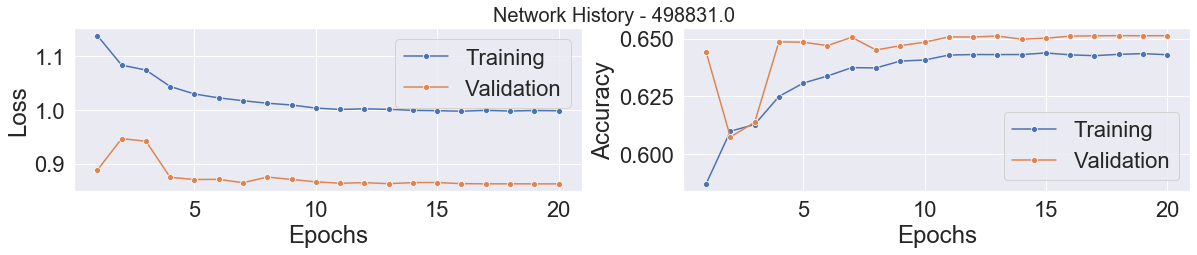

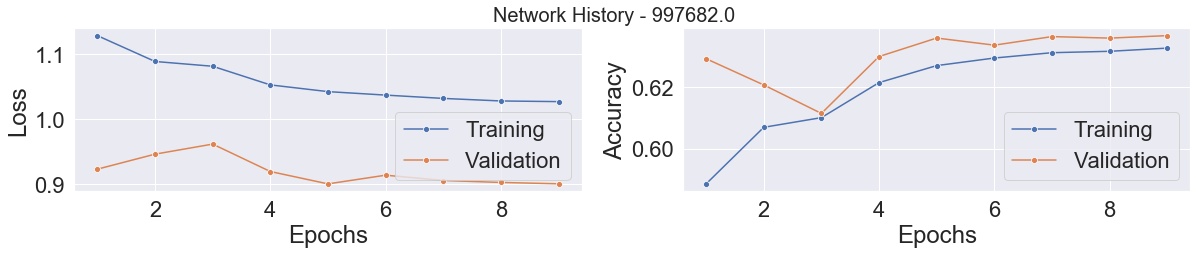

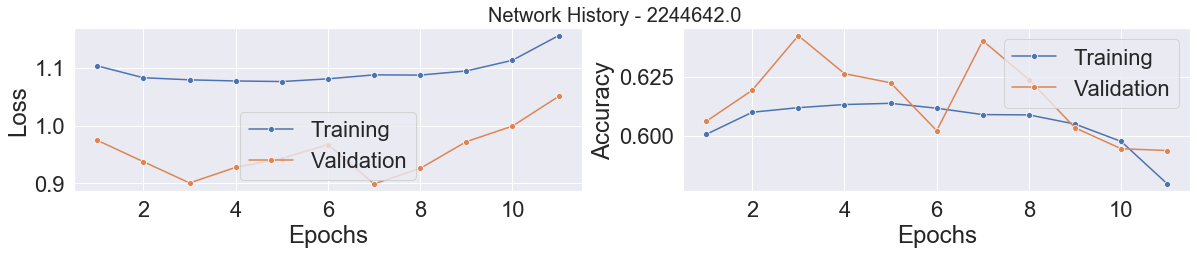

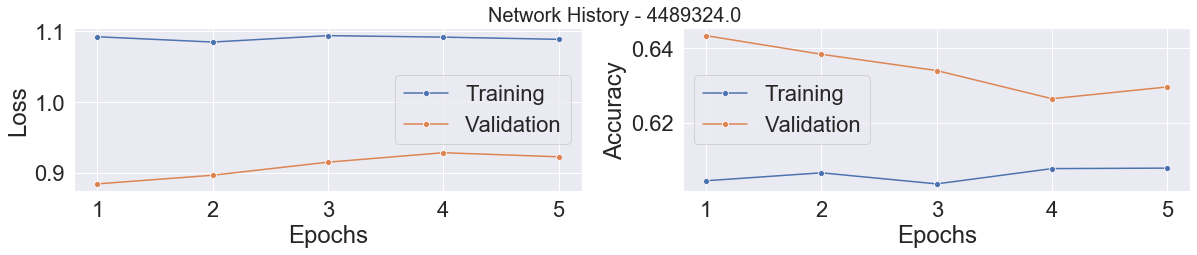

128 Units, DR 0.2, RDR 0.2, BS 128, LR 0.01 - Confusion Matrix - Sample Size: 498831.0
[[12637, 3449, 936, 171, 242],
 [2574, 3343, 1709, 318, 187],
 [1133, 2598, 4674, 2179, 670],
 [426, 875, 3530, 9372, 6618],
 [877, 855, 2296, 11876, 51163]]

128 Units, DR 0.2, RDR 0.2, BS 128, LR 0.01 - Confusion Matrix - Sample Size: 997682.0
[[24011, 8390, 1772, 375, 471],
 [4879, 7256, 3491, 681, 293],
 [1854, 5629, 9362, 4172, 1254],
 [718, 2091, 7394, 18767, 12665],
 [1712, 2356, 5303, 25172, 99353]]

128 Units, DR 0.2, RDR 0.2, BS 128, LR 0.01 - Confusion Matrix - Sample Size: 2244642.0
[[53069, 18894, 4898, 750, 1480],
 [11030, 14836, 8845, 1312, 1073],
 [4621, 12000, 22642, 7665, 4162],
 [1678, 5316, 18842, 33777, 34347],
 [4464, 6766, 14140, 39391, 235163]]

128 Units, DR 0.2, RDR 0.2, BS 128, LR 0.01 - Confusion Matrix - Sample Size: 4489324.0
[[117358, 27289, 8706, 1751, 2654],
 [27340, 25742, 15726, 3591, 2004],
 [11952, 21801, 38580, 21844, 7399],
 [4592, 9359, 28158, 82374, 62923],
 [

In [19]:
plt_names = report_all[report_all.sample_size.isin([8978916, 4489324])].plt_name.unique()

report_filtered = report_all[report_all.plt_name.isin(plt_names.tolist())].sort_values("plt_name")
sizes = sorted(report_filtered.sample_size.unique())

for name in plt_names:
    print(f'\n\nModel: {name}\n\n')
    
    current_model_report = report_filtered[report_filtered.plt_name == name].sort_values("sample_size")
    
    print("Report file(s):")
    for file in current_model_report.report_file.unique():
        print(f'\t{file}')
    
    print("Notebooks Used:")
    for idx, row in current_model_report.iterrows():
        print(f'\t{row.environment}')
    
    print(f'Scores:')
    print(current_model_report[["sample_size", 
                                "accuracy", 
                                "accuracy_train", 
                                "loss", "loss_train", "eval_metric", "eval_metric_train"]])

    
    # scores
    f, a = plt.subplots(1, 1, figsize = (20, 5))
    sns.lineplot(data = current_model_report,
                x = "sample_size",
                y = "eval_metric",
                label = "custom score",
                 marker = "o",
                 color = "r")
    sns.lineplot(data = current_model_report,
                x = "sample_size",
                y = "eval_metric_train",
                label = "custom score - train",
                 marker = "o",
                 alpha = 0.25,
                 color = "r")
    sns.lineplot(data = current_model_report,
                x = "sample_size",
                y = "accuracy",
                label = "accuracy",
                 marker = "o",
                 color = "orange")
    sns.lineplot(data = current_model_report,
                x = "sample_size",
                y = "accuracy_train",
                label = "accuracy - train",
                 alpha = 0.25,
                 marker = "o",
                 color = "orange")
    sns.lineplot(data = current_model_report,
                x = "sample_size",
                y = "loss",
                label = "loss",
                 marker = "o",
                 color = "b")
    sns.lineplot(data = current_model_report,
                x = "sample_size",
                y = "loss_train",
                label = "loss - train",
                 alpha = 0.25,
                 marker = "o",
                 color = "b")
    a.set_title(name, fontsize = 14)
    a.set_ylabel("")
    a.set_xlabel("Samples")
        
    _ = plt.setp(a.get_legend().get_texts(), fontsize='10')    
    
    plt.show()
    
    # classification report histograms
#     print(f"\n\n{name} - Classification Report - Train Set")
#     pu.plot_score_histograms(report_filtered[report_filtered.plt_name == name].sort_values("sample_size", ascending = True), 
#                          version = 2,
#                          label = "sample_size",
#                             is_training_data = True)
#     plt.show()
    print(f"{name} - Classification Report - Test Set")
    pu.plot_score_histograms(current_model_report, 
                         version = 2,
                         label = "sample_size",
                            is_training_data = False)
    
    # network history
    for size in sizes:
        report = current_model_report[(current_model_report.sample_size == size)]
        if len(report.network_history.values) > 0:
            network_history = json.loads(report.network_history.values[0])
            pu.plot_network_history(network_history,
                                   description = f'{size}',
                                    figsize = (20, 3),
                                   title_font_size = 20)
        
    # confusion matrix
    for size in sizes:
        report = current_model_report[(current_model_report.sample_size == size)]
        if len(report.confusion_matrix.values) > 0:
            cm = json.loads(report.confusion_matrix.values[0])
            print(f'{name} - Confusion Matrix - Sample Size: {size}')
            pprint(cm)
            print()

